In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Input, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [3]:
cfi = tf.keras.datasets.cifar10

In [4]:
(X_train,y_train),(X_test,y_test) = cfi.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
y_train.shape

(50000, 1)

In [6]:
X_train,X_test = X_train/255.0, X_test/255.0
y_train,y_test = y_train.flatten(),y_test.flatten()

In [7]:
K = len(set(y_train))
K

10

In [8]:
i = Input(shape = X_train[0].shape)
x = Conv2D(32, (3,3),strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model1 = Model(i,x)


In [9]:
model1.compile(optimizer='adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])
with tf.device('/device:GPU:0'):

  r = model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15)

Epoch 1/15
1563/1563 [==============================] - 9s 4ms/step - loss: 1.5702 - accuracy: 0.4268 - val_loss: 1.3326 - val_accuracy: 0.5217
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2765 - accuracy: 0.5417 - val_loss: 1.1204 - val_accuracy: 0.5991
Epoch 3/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1361 - accuracy: 0.5942 - val_loss: 1.0922 - val_accuracy: 0.6042
Epoch 4/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0369 - accuracy: 0.6288 - val_loss: 0.9994 - val_accuracy: 0.6486
Epoch 5/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9707 - accuracy: 0.6534 - val_loss: 0.9390 - val_accuracy: 0.6740
Epoch 6/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9061 - accuracy: 0.6800 - val_loss: 0.9049 - val_accuracy: 0.6805
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8560 - accuracy: 0.6954 - val_loss: 0.8674 - val_accuracy:

In [4]:
device_name = tf.test.gpu_device_name()

In [5]:
device_name

'/device:GPU:0'

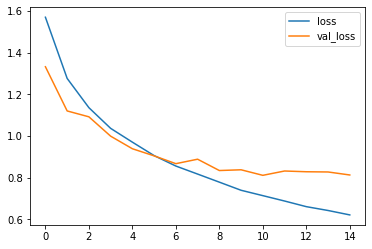

In [10]:
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()

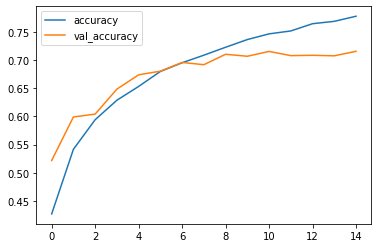

In [11]:
plt.plot(r.history['accuracy'],label = 'accuracy')
plt.plot(r.history['val_accuracy'],label = 'val_accuracy')
plt.legend()

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
y_pred = model1.predict(X_test).argmax(axis=1)
cf = confusion_matrix(y_test,y_pred)
cf

array([[750,  17,  34,  30,  25,   7,  15,  10,  76,  36],
       [  9, 840,   3,  12,   7,   5,  18,   2,  21,  83],
       [ 55,   5, 559,  60, 114,  60,  99,  28,  13,   7],
       [ 18,   8,  41, 532,  62, 198,  95,  21,   9,  16],
       [ 18,   1,  34,  65, 711,  44,  68,  47,   7,   5],
       [  8,   1,  36, 175,  49, 638,  49,  36,   4,   4],
       [  3,   6,  19,  40,  32,  20, 869,   4,   6,   1],
       [  9,   0,  17,  56,  78,  64,  24, 734,   5,  13],
       [ 43,  30,  14,  21,  17,   2,  13,   5, 834,  21],
       [ 21,  72,   4,  18,   4,  10,  21,  12,  38, 800]])

In [8]:
len(X_train)

50000

In [13]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8805477794723901478
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14444920832
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4598502714682548596
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]